# 2D mapping with a robot using odometric coordinates

## Include Python Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Read the laser data and transform to the robot's coordinates system

We read the data in the text file "f". The data is stored in the form:

- x
- y
- $\theta$

These coordinates are also referred to as the robot's odometric position.

![Robot odometric coordinate system](robot.png)

The robot's coordinates system is fixed and changes everytime the robot changes its angle (rotates). So we need to transform all the $(x, y)$ coordinates using the $\theta$ offset angle from the initial coordinates system.

To achieve the transformation, we use a 2D rotation matrix:

$\begin{bmatrix}
    x_t \\
    y_t \\
\end{bmatrix} = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix}\begin{bmatrix}
x \\
y \\
\end{bmatrix}.$

In [27]:
f = open("lab.txt").read()
f = np.array(f.split("\n"))
print(f.shape)
x = []
y = []
x_t = []
y_t = []
th = []
for i in range(len(f)):
    line = f[i].split()
    if (len(line) > 0):
        th.append(line[2])
        theta = np.radians(float(line[2]))

        c, s = np.cos(theta), np.sin(theta)

        rot = np.matrix([[c, -s], [s, c]])
        
        v = np.array((float(line[0]), float(line[1])))
        v_t = rot.dot(v)
        #print(v_t, v_t[0, 0], v_t[0, 1])

        y_t.append(v_t[0, 1])
        x_t.append(v_t[0, 0])

        y.append(line[1])
        x.append(line[0])
l = int(len(th))
y = y[:l]
x = x[:l]
th = th[:l]
print(len(y))
print(len(th))
print(len(x))
print(l)

(34625,)
34624
34624
34624
34624


## Display the new coordinates

In [28]:
print(x_t[:10])

[-321.24000000000001, -312.36099999999999, -302.11200000000002, -292.67099999999999, -285.43099999999998, -277.54000000000002, -268.32400000000001, -261.25799999999998, -252.88200000000001, -245.934]


In [29]:
print(y_t[:10])

[-353.54899999999998, -351.30500000000001, -347.54199999999997, -344.32799999999997, -343.101, -341.06, -337.46699999999998, -335.91800000000001, -332.80700000000002, -331.05200000000002]


# A few examples of the reconstruction from the raw data to a readable map

## Legend:
- First image is the raw data
- Second image is the reconstructed data

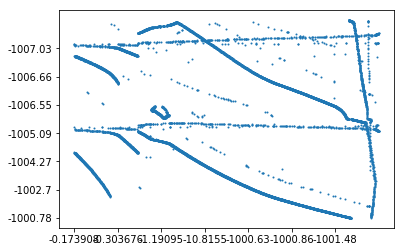

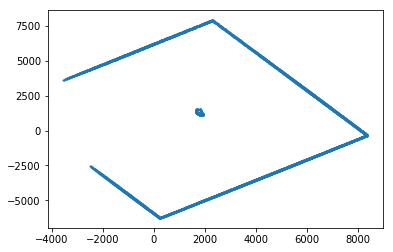

In [20]:
plt.scatter(x, y, s=1.0)
plt.locator_params(nbins=7)
plt.show()
plt.scatter(x_t, y_t, s=1.0)
plt.locator_params(nbins=7)
plt.show()

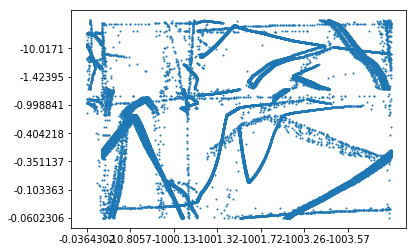

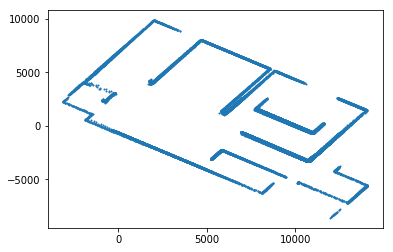

In [26]:
plt.scatter(x, y, s=1.0)
plt.locator_params(nbins=7)
plt.show()
plt.scatter(x_t, y_t, s=1.0)
plt.locator_params(nbins=7)
plt.show()

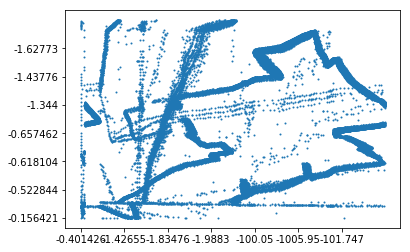

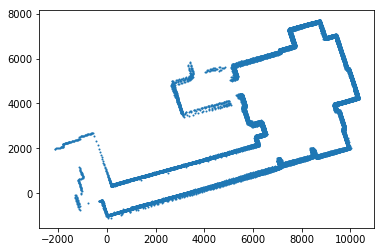

In [30]:
plt.scatter(x, y, s=1.0)
plt.locator_params(nbins=7)
plt.show()
plt.scatter(x_t, y_t, s=1.0)
plt.locator_params(nbins=7)
plt.show()

# A few more examples of reconstructed maps

![title](test1.png)

![title](test2.png)

![title](test3.png)